In [1]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import sys
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)

from wann_src import * 
from domain import *  

%load_ext autoreload

%autoreload 2

In [2]:
# Load stats:
"""
# Rows: [generations]
# Cols:
0: evaluations (one evaluation of one individual -- may be multiple rollouts)
1: median fitness 
2: maximum fitness
3: Best Fitness (fitness earned with best performing individual over entire run)
4: peak fitness (fitness earned with best single weight value by max individual)
5: median # of nodes in population
6: median # of connections in population]
7: Average Fitness
8: Average # of nodes in population
9: Avereage # of connections in population
10: Average # of nodes in best individual
11: Average # of connections in best individual
"""
stats = np.loadtxt('log/fashionmnist_final_final_stats.out', delimiter=',') 
runTime = np.loadtxt('log/sample_runTime.out', delimiter=',') 

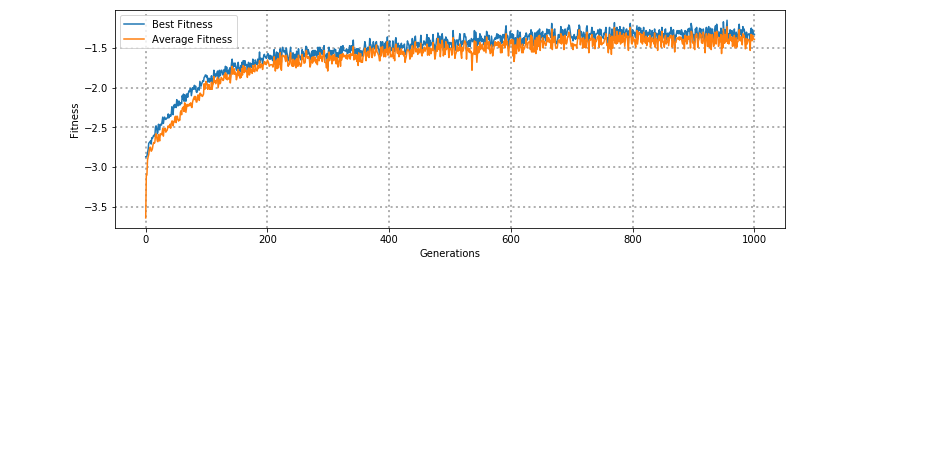

In [3]:
# Plot fitness progress:
plt.figure(figsize=(12,4))
plt.grid(linestyle='--', linewidth=0.1)
plt.plot(stats[:,2], label="Best Fitness")
# plt.plot(stats[:,3], label="Best Fitness over all generations")
plt.plot(stats[:,7], label="Average Fitness")
plt.legend()
plt.grid(linestyle=':', linewidth=2)
plt.xlabel('Generations')
plt.ylabel('Fitness')

# Approximate time on 8 cores
genKey = np.array([32,128,256,384,640,896],dtype=int)

for i in range(len(genKey)):
    gen = int(genKey[i]/8)-1
    time = runTime[gen]/3600
    plt.annotate(str(round(time,1))+' hours', xy=(gen*8,0), xytext=(gen*8,-200),
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

# plt.title('Sample Run of WANN Cart-Pole Swing-Up on 8 Core Laptop')

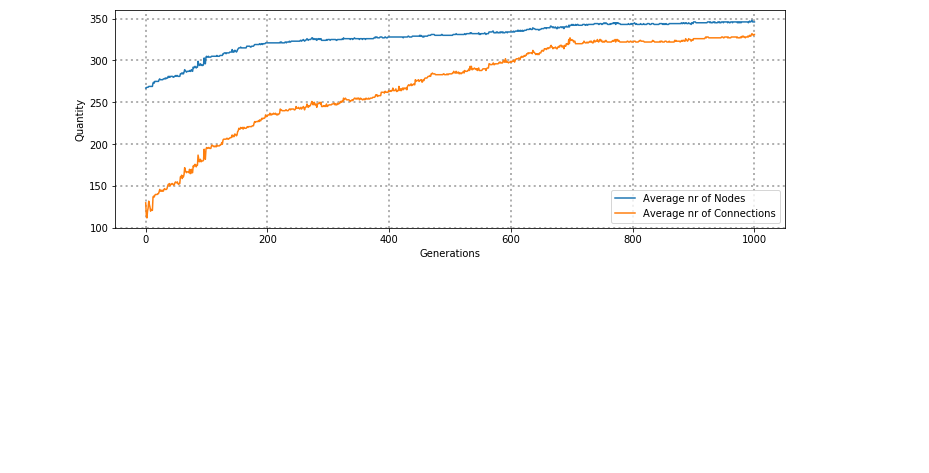

In [4]:
# Plot fitness progress:
plt.figure(figsize=(12,4))
plt.grid(linestyle='--', linewidth=0.1)
plt.plot(stats[:,8], label="Average nr of Nodes")
plt.plot(stats[:,9], label="Average nr of Connections")


plt.legend()
plt.grid(linestyle=':', linewidth=2)
plt.xlabel('Generations')
plt.ylabel('Quantity')

# Approximate time on 8 cores
genKey = np.array([32,128,256,384,640,896],dtype=int)

for i in range(len(genKey)):
    gen = int(genKey[i]/8)-1
    time = runTime[gen]/3600
    plt.annotate(str(round(time,1))+' hours', xy=(gen*8,0), xytext=(gen*8,-200),
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

# plt.title('Sample Run of WANN Cart-Pole Swing-Up on 8 Core Laptop')

In [5]:
IN_FILE='log/fashionmnist_final_final_best.out'
OUT_FILE='./test_testrun_'
HYPERPARAMS_DEFAULT='p/default_wan.json'
HYPERPARAMS_FILE='p/fashion_mnist.json'
N_WEIGHTS=6 #number of weights to evaluate
N_REPS=1
VIEW=False#visualize trial
SEED=-1
TEST_ACCURACY=True
N_CLASSES_TO_USE=10

In [6]:
# Loading task and parameters
hyp = loadHyp(pFileName=HYPERPARAMS_DEFAULT)
updateHyp(hyp, HYPERPARAMS_FILE)
task = Task(games[hyp['task']], nReps=hyp['alg_nReps'])

# Loading the individual
wVec, aVec, wKey = importNet(IN_FILE)

	*** Running with hyperparameters:  p/fashion_mnist.json 	***


In [7]:
##obtain results

train_accuracies,\
test_accuracies,\
ensemble_accuracy_train,\
ensemble_accuracy_test,\
train_predictions,\
test_predictions,\
train_majority_pred,\
test_majority_pred,\
y_train,\
y_test = task.evaluateModel(wVec, aVec, hyp, nVals=N_WEIGHTS, nRep=N_REPS, returnVals=True, seed=SEED, mnist=False)

accuracy testing
accuracy testing
accuracy testing
accuracy testing
accuracy testing
accuracy testing


In [8]:
used_inputs = task.usedInputs(wVec,aVec)

In [9]:
tally = list(range(0,256))
ui = []

for i in tally:
    tally[i] = 0
    if i in used_inputs[1]:
        tally[i] += 1
    

In [10]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

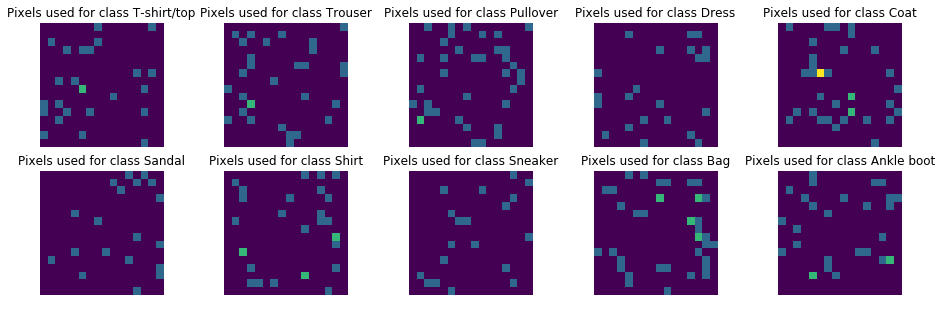

In [11]:

# Extract input tallies from best individual
input_tallies = []

for k,inputs_used in used_inputs.items():
    input_tally = np.zeros(256)
    for arg in inputs_used:
        if arg < 256:
            input_tally[arg] += 1
    input_tallies.append(input_tally)
    
# Create plots of the inputs (pixels) used in the tree of the best individual for each class
# Note: for the best-looking plot, this implementation assumes that N_CLASSES_TO_USE is set to 10
fig, ax = plt.subplots(2, 5, figsize=(16,5))
ax = ax.ravel()
for i, tally in enumerate(input_tallies):
    img_shape = int(math.sqrt(256))
    ax[i].imshow(np.array(tally).reshape(img_shape, img_shape), clim=(0,np.max(input_tallies)))
    ax[i].axis("off")
    ax[i].set_title("Pixels used for class {}".format(classes[i]))

plt.show()

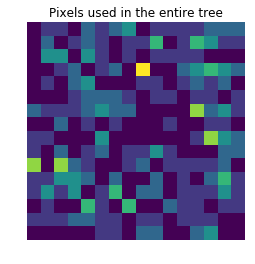

In [12]:

# Plot image of all inputs used in the tree
plt.imshow(np.sum(input_tallies, axis=0).reshape(16,16))
plt.axis("off")
plt.title("Pixels used in the entire tree")
plt.savefig('inputs_wann_fashion_mnist.png')
plt.show()

In [13]:
## determine best model
print(train_accuracies)
print(test_accuracies)
print(ensemble_accuracy_train)
print(ensemble_accuracy_test)

[[0.68 0.66 0.59 0.43 0.56 0.63]]
[[0.68 0.66 0.59 0.43 0.56 0.63]]
0.66605
0.6656


In [14]:
cm_best_train = confusion_matrix(train_predictions[0,:], y_train, labels=range(N_CLASSES_TO_USE))
cm_best_test = confusion_matrix(test_predictions[0,:],y_test, labels=range(N_CLASSES_TO_USE))
cm_ensemble_train = confusion_matrix(train_majority_pred, y_train, labels=range(N_CLASSES_TO_USE))
cm_ensemble_test = confusion_matrix(test_majority_pred, y_test, labels=range(N_CLASSES_TO_USE))

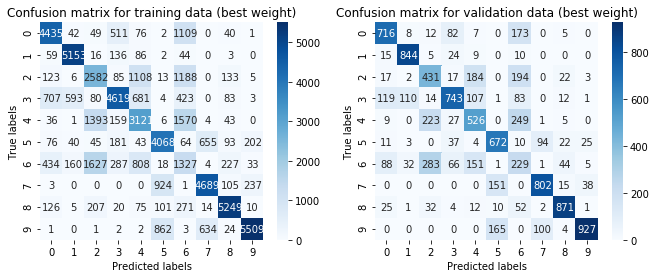

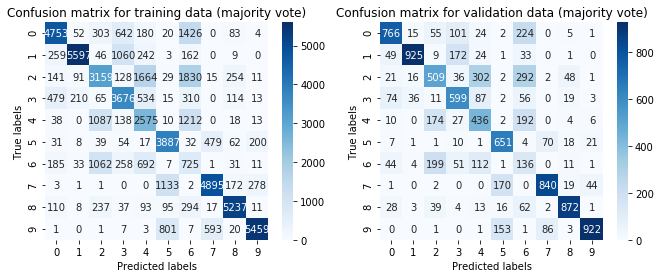

In [34]:
# Create figure
fig, ax = plt.subplots(1,2, figsize=(11,4))
ax = ax.ravel()

# Plot confusion matrix for training data using best weight
sns.heatmap(cm_best_train, annot=True, fmt='g', ax=ax[0], cmap="Blues")
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].set_title('Confusion matrix for training data (best weight)')

# Plot confusion matrix for validation data using best weight
sns.heatmap(cm_best_test, annot=True, fmt='g', ax=ax[1], cmap="Blues")
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].set_title('Confusion matrix for validation data (best weight)')
plt.savefig('best_confusion_wann_fashion_mnist.png')
plt.show()
fig, ax = plt.subplots(1,2, figsize=(11,4))
ax = ax.ravel()

# Plot confusion matrix for training data using majority vote
sns.heatmap(cm_ensemble_train, annot=True, fmt='g', ax=ax[0], cmap="Blues")
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].set_title('Confusion matrix for training data (majority vote)')

# Plot confusion matrix for validation data using majority vote
sns.heatmap(cm_ensemble_test, annot=True, fmt='g', ax=ax[1], cmap="Blues")
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')
ax[1].set_title('Confusion matrix for validation data (majority vote)')

# Show the result
plt.savefig('majority_vote_confusion_wann_fashion_mnist.png')
plt.show()